<a href="https://colab.research.google.com/github/richapatel93/Ecommerce-sales-analytics/blob/main/E_Commerce_Data_Pipeline_%26_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: tool *setup*

In [ ]:
!pip install sqlalchemy streamlit
import pandas as pd
import requests

print("✅ Setup complete. Pandas + Requests + SQLAlchemy + Streamlit ready!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.4 MB/s eta 0:00:00
✅ Setup complete. Pandas + Requests + SQLAlchemy + Streamlit ready!


# Step 2: Extract Data

A) Load data from a CSV (simulate orders dataset)

In [ ]:
import pandas as pd

# Simulated orders data (like from a CSV file)
data = {
    "order_id": [1, 2, 3, 4, 5],
    "customer_id": [101, 102, 101, 103, 104],
    "product": ["Shirt", "Shoes", "Shirt", "Watch", "Shoes"],
    "quantity": [2, 1, 3, 1, 2],
    "price": [500, 1200, 500, 1500, 1200],
    "order_date": ["2023-08-01", "2023-08-02", "2023-08-02", "2023-08-03", "2023-08-03"]
}

df_orders = pd.DataFrame(data)
print("✅ Orders data extracted from CSV (simulated):")
print(df_orders)


✅ Orders data extracted from CSV (simulated):
   order_id  customer_id product  quantity  price  order_date
0         1          101   Shirt         2    500  2023-08-01
1         2          102   Shoes         1   1200  2023-08-02
2         3          101   Shirt         3    500  2023-08-02
3         4          103   Watch         1   1500  2023-08-03
4         5          104   Shoes         2   1200  2023-08-03


B) Extract data from an API (simulate product details)

In [ ]:
import requests

# Call the FakeStore API for product data
url = "https://fakestoreapi.com/products"
response = requests.get(url)
products = response.json()

# Show first 2 products
print("✅ Products data extracted from API (first 2 shown):")
print(products[:2])


✅ Products data extracted from API (first 2 shown):
[{'id': 1, 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops', 'price': 109.95, 'description': 'Your perfect pack for everyday use and walks in the forest. Stash your laptop (up to 15 inches) in the padded sleeve, your everyday', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_t.png', 'rating': {'rate': 3.9, 'count': 120}}, {'id': 2, 'title': 'Mens Casual Premium Slim Fit T-Shirts ', 'price': 22.3, 'description': 'Slim-fitting style, contrast raglan long sleeve, three-button henley placket, light weight & soft fabric for breathable and comfortable wearing. And Solid stitched shirts with round neck made for durability and a great fit for casual fashion wear and diehard baseball fans. The Henley style round neckline includes a three-button placket.', 'category': "men's clothing", 'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879._SX._UX._SY._UY_t.png', 'rating': {'rate

#Step 3: Transform Data (Cleaning & Preparing)

A) Clean Orders Data (CSV)

In [ ]:
# Convert order_date to real datetime (important for grouping later)
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

# Create a new column for revenue
df_orders['revenue'] = df_orders['quantity'] * df_orders['price']

# Remove rows with missing order_id (simulate cleaning)
df_orders = df_orders.dropna(subset=['order_id'])

print("✅ Cleaned Orders Data:")
print(df_orders)


✅ Cleaned Orders Data:
   order_id  customer_id product  quantity  price order_date  revenue
0         1          101   Shirt         2    500 2023-08-01     1000
1         2          102   Shoes         1   1200 2023-08-02     1200
2         3          101   Shirt         3    500 2023-08-02     1500
3         4          103   Watch         1   1500 2023-08-03     1500
4         5          104   Shoes         2   1200 2023-08-03     2400


b) Clean Products Data (API)

In [ ]:
import pandas as pd

# Convert products (list of dicts) into a DataFrame
df_products = pd.DataFrame(products)

# Keep only useful columns: id, title, price, category, rating
df_products = df_products[['id', 'title', 'price', 'category']]

# Rename 'id' to 'product_id' (important for joining later)
df_products = df_products.rename(columns={'id': 'product_id', 'title': 'product_name'})

print("✅ Cleaned Products Data (first 5 rows):")
print(df_products.head())


✅ Cleaned Products Data (first 5 rows):
   product_id                                       product_name   price  \
0           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1           2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2           3                                 Mens Cotton Jacket   55.99   
3           4                               Mens Casual Slim Fit   15.99   
4           5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   

         category  
0  men's clothing  
1  men's clothing  
2  men's clothing  
3  men's clothing  
4        jewelery  


#Step 4:Load Data into SQLite

A) Save to **SQLite**

In [ ]:
from sqlalchemy import create_engine

# Create SQLite database (warehouse.db will be saved in Colab session)
engine = create_engine('sqlite:///warehouse.db', echo=False)

# Save both tables
df_orders.to_sql('orders', con=engine, if_exists='replace', index=False)
df_products.to_sql('products', con=engine, if_exists='replace', index=False)

print("✅ Data loaded into SQLite database (warehouse.db) with 2 tables: orders, products")


✅ Data loaded into SQLite database (warehouse.db) with 2 tables: orders, products


B) Query the Database (test that it worked)

In [ ]:
import pandas as pd

# Simple SQL query: select all orders
check_orders = pd.read_sql("SELECT * FROM orders", con=engine)
check_products = pd.read_sql("SELECT * FROM products LIMIT 5", con=engine)

print("✅ Orders Table from DB:")
print(check_orders)

print("\n✅ Products Table from DB (first 5 rows):")
print(check_products)


✅ Orders Table from DB:
   order_id  customer_id product  quantity  price                  order_date  \
0         1          101   Shirt         2    500  2023-08-01 00:00:00.000000   
1         2          102   Shoes         1   1200  2023-08-02 00:00:00.000000   
2         3          101   Shirt         3    500  2023-08-02 00:00:00.000000   
3         4          103   Watch         1   1500  2023-08-03 00:00:00.000000   
4         5          104   Shoes         2   1200  2023-08-03 00:00:00.000000   

   revenue  
0     1000  
1     1200  
2     1500  
3     1500  
4     2400  

✅ Products Table from DB (first 5 rows):
   product_id                                       product_name   price  \
0           1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1           2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2           3                                 Mens Cotton Jacket   55.99   
3           4                               Mens Casual Slim Fit 

# Step 5: Data Modeling & SQL Queries

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Connect to our SQLite database
engine = create_engine('sqlite:///warehouse.db', echo=False)

# Example Query 1: Top 5 best-selling products
query = """
SELECT product, SUM(quantity) AS total_sold
FROM orders
GROUP BY product
ORDER BY total_sold DESC
LIMIT 5;
"""

top_products = pd.read_sql(query, engine)
print("Top 5 Best-Selling Products:")
print(top_products)


Top 5 Best-Selling Products:
  product  total_sold
0   Shirt           5
1   Shoes           3
2   Watch           1


# Revenue by Category

In [ ]:
# Reload orders
orders_df = pd.read_sql("SELECT * FROM orders;", engine)

# Step 1: Create a mapping of product -> category (manually for now)
product_category_map = {
    "Shirt": "men's clothing",
    "Shoes": "footwear",
    "Watch": "accessories"
}

# Step 2: Add a category column to orders
orders_df["category"] = orders_df["product"].map(product_category_map)

# Step 3: Group by category and sum revenue
revenue_by_category = orders_df.groupby("category")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False)

print("Revenue by Category:")
print(revenue_by_category)


Revenue by Category:
         category  revenue
1        footwear     3600
2  men's clothing     2500
0     accessories     1500


Customer Behavior (Top Spenders)

In [ ]:
# Group by customer and calculate total spending
customer_spending = orders_df.groupby("customer_id")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False)

print("Top Customers by Spending:")
print(customer_spending)


Top Customers by Spending:
   customer_id  revenue
0          101     2500
3          104     2400
2          103     1500
1          102     1200


# Time Analysis (Daily Sales Trend)

In [ ]:
# Group by order_date and calculate total revenue
daily_sales = orders_df.groupby("order_date")["revenue"].sum().reset_index().sort_values(by="order_date")

print("Daily Sales Trend:")
print(daily_sales)


Daily Sales Trend:
                   order_date  revenue
0  2023-08-01 00:00:00.000000     1000
1  2023-08-02 00:00:00.000000     2700
2  2023-08-03 00:00:00.000000     3900


# Step 5:Visualization

###Visualize Top-Selling Products

/tmp/ipython-input-1107023056.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="product", y="total_sold", palette="viridis")


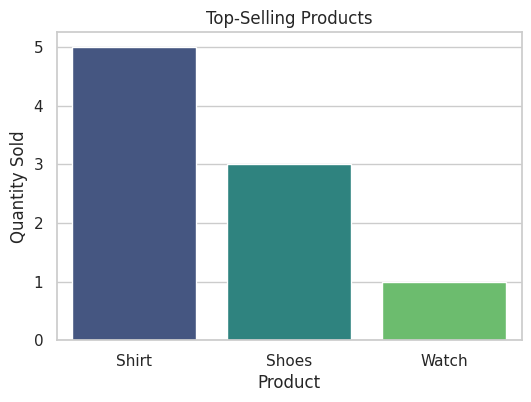

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Top products from your previous query
top_products = pd.DataFrame({
    "product": ["Shirt", "Shoes", "Watch"],
    "total_sold": [5, 3, 1]
})

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=top_products, x="product", y="total_sold", palette="viridis")
plt.title("Top-Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()

Revenue by Category (Pie Chart)

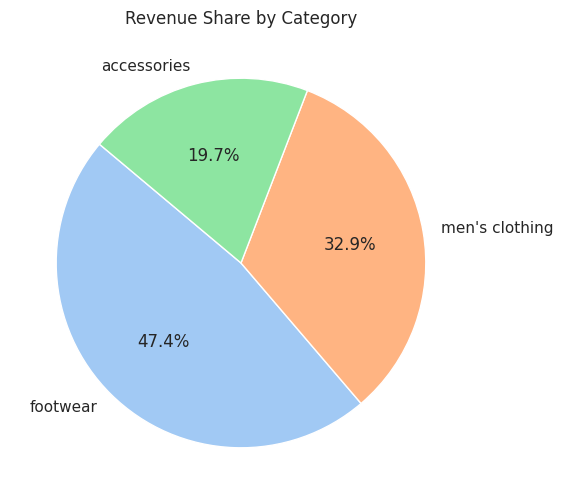

In [ ]:
# Revenue by category from previous step
revenue_by_category = pd.DataFrame({
    "category": ["footwear", "men's clothing", "accessories"],
    "revenue": [3600, 2500, 1500]
})

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(revenue_by_category["revenue"], labels=revenue_by_category["category"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue Share by Category")
plt.show()


Customer Spending (Horizontal Bar)

/tmp/ipython-input-1090888946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_spending, y="customer_id", x="revenue", palette="magma")


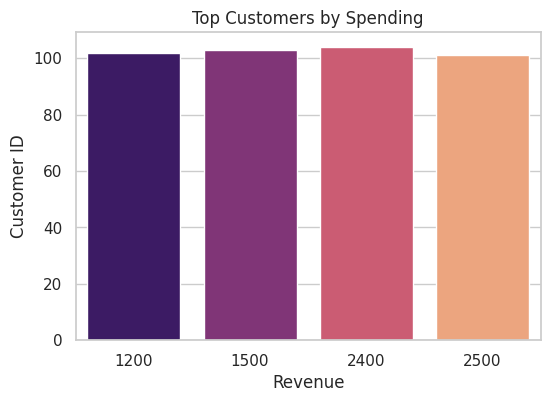

In [ ]:
customer_spending = pd.DataFrame({
    "customer_id": [101, 104, 103, 102],
    "revenue": [2500, 2400, 1500, 1200]
})

# Horizontal bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=customer_spending, y="customer_id", x="revenue", palette="magma")
plt.title("Top Customers by Spending")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.show()


Daily Sales Trend (Line Chart)

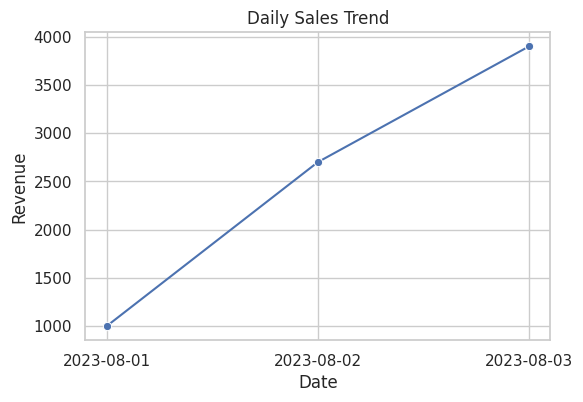

In [ ]:
daily_sales = pd.DataFrame({
    "order_date": ["2023-08-01","2023-08-02","2023-08-03"],
    "revenue": [1000, 2700, 3900]
})

plt.figure(figsize=(6,4))
sns.lineplot(data=daily_sales, x="order_date", y="revenue", marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


# Install Streamlit in Colab

In [ ]:
!pip install streamlit
!pip install pydeck


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.9 MB/s eta 0:00:00


In [ ]:
!streamlit run app.ipyb &


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipyb.
For more information, please see https://docs.streamlit.io
